<a href="https://colab.research.google.com/github/tomoyafujimori/face/blob/main/face2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. リポジトリをクローン（StyleGAN2-ADA-PyTorchを取得）
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git

# 2. ディレクトリを移動
%cd stylegan2-ada-pytorch

# 3. 必要なライブラリをインストール
!pip install torch torchvision ninja imageio imageio-ffmpeg


Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 131 (delta 0), reused 0 (delta 0), pack-reused 129 (from 2)
Receiving objects: 100% (131/131), 1.13 MiB | 19.96 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/stylegan2-ada-pytorch
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 4.9 MB/s eta 0:00:00


Cloning into 'stylegan2encoder'...
remote: Enumerating objects: 111, done.
remote: Total 111 (delta 0), reused 0 (delta 0), pack-reused 111 (from 1)
Receiving objects: 100% (111/111), 1.55 MiB | 16.05 MiB/s, done.
Resolving deltas: 100% (35/35), done.
/content/stylegan2-ada-pytorch/stylegan2encoder
--2025-10-21 06:27:21--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-10-21 06:27:21--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  32.9MB/s  

Saving 証明写真.jpg to 証明写真.jpg
移動完了: 証明写真.jpg
2025-10-21 06:27:53.211500: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761028073.231800    1059 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761028073.237685    1059 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761028073.252561    1059 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761028073.252587    1059 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761028073.252590    1059 comput

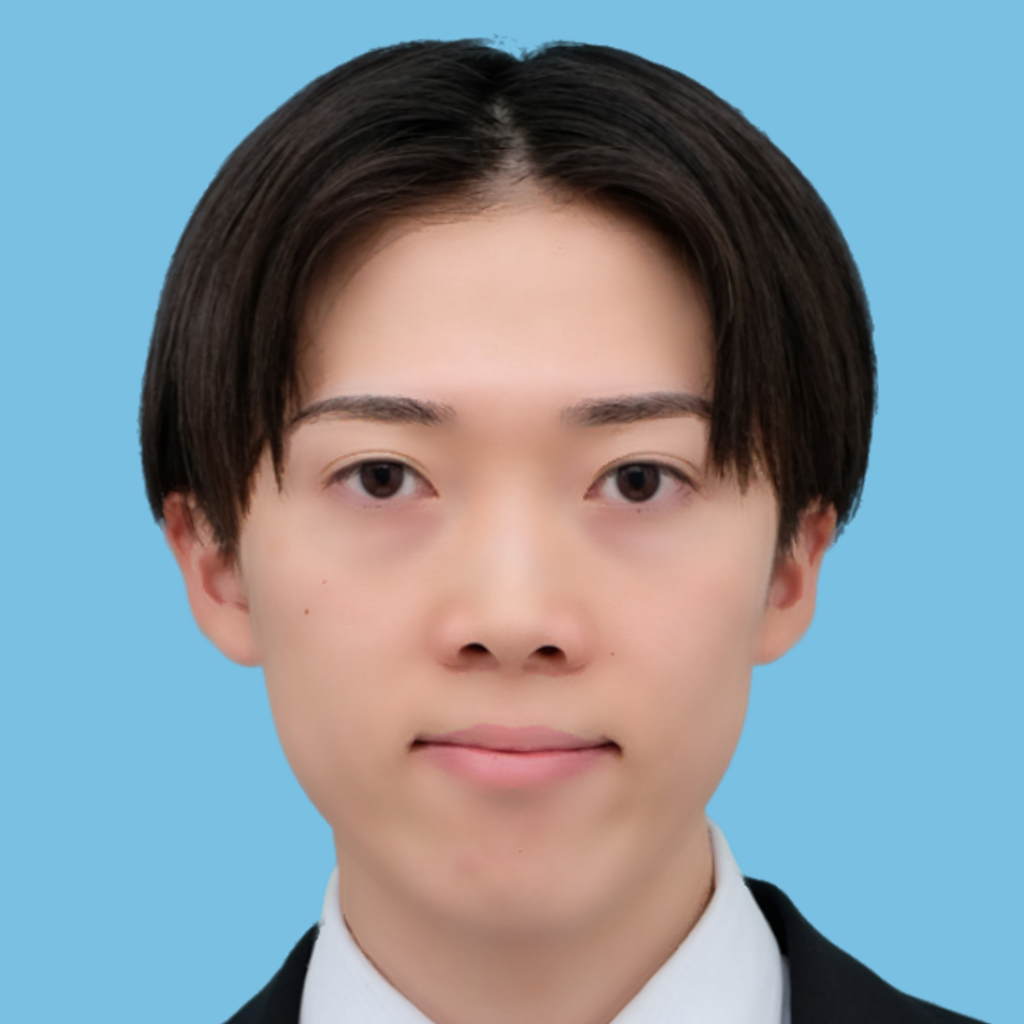

/content/stylegan2-ada-pytorch
Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 131 (delta 0), reused 0 (delta 0), pack-reused 129 (from 2)
Receiving objects: 100% (131/131), 1.13 MiB | 24.63 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/stylegan2-ada-pytorch/stylegan2-ada-pytorch

投影対象の画像: ../stylegan2encoder/aligned_images/証明写真_01.png
Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... W1021 06:28:43.724000 1202 torch/utils/cpp_extension.py:2425] TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
W1021 06:28:43.724000 1202 torch/utils/cpp_extension.py:2425] If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'] to specific architect

In [2]:
# 1. プロジェクトをクローン
!git clone https://github.com/rolux/stylegan2encoder.git
%cd stylegan2encoder

# 2. 依存関係をインストール
!pip install -q scipy dlib

# 3. 顔のランドマーク（特徴点）モデルをダウンロード
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

# 4. PILの互換性問題を修正
!sed -i 's/PIL.Image.ANTIALIAS/PIL.Image.LANCZOS/g' ffhq_dataset/face_alignment.py

# 5. フォルダを作成
!mkdir -p raw_images aligned_images

# 6. 画像をアップロード
from google.colab import files
print("あなたの元の顔画像をアップロードしてください:")
uploaded = files.upload()

# 7. アップロードしたファイルを raw_images フォルダへ移動
import shutil
for filename in uploaded.keys():
    shutil.move(filename, f'raw_images/{filename}')
    print(f"移動完了: {filename}")

# 8. 画像のアライメント（顔位置合わせ）を実行
!python align_images.py raw_images/ aligned_images/

# 9. アライメント結果を確認
!ls -lh aligned_images/

# 10. アライメント後の画像を表示
from IPython.display import Image, display
import glob
for img in glob.glob('aligned_images/*.png'):
    print(f"\nアライメント後: {img}")
    display(Image(img))

# 11. StyleGAN2-ADA-PyTorch をクローンして投影に使用
%cd ..
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
%cd stylegan2-ada-pytorch
!pip install -q ninja

# 12. アライメント後の画像ファイル名を取得
aligned_images = glob.glob('../stylegan2encoder/aligned_images/*.png')
if aligned_images:
    target_image = aligned_images[0]
    print(f"\n投影対象の画像: {target_image}")

    # 13. 投影を実行
    !python projector.py \
      --outdir=out \
      --target={target_image} \
      --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl \
      --num-steps=6000

    # 14. 投影結果を表示
    print("\n投影が完了しました！結果を表示します:")
    for result in sorted(glob.glob('out/*.png')):
        display(Image(result))
else:
    print("アライメント後の画像が見つかりません。アライメント処理にエラーがないか確認してください。")


Cloning into 'stylegan2encoder'...
remote: Enumerating objects: 111, done.
remote: Total 111 (delta 0), reused 0 (delta 0), pack-reused 111 (from 1)
Receiving objects: 100% (111/111), 1.55 MiB | 25.22 MiB/s, done.
Resolving deltas: 100% (35/35), done.
/content/stylegan2-ada-pytorch/pixel2style2pixel/pixel2style2pixel/stylegan2encoder
--2025-10-21 06:39:04--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-10-21 06:39:04--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[=====

Saving 証明写真.jpg to 証明写真.jpg
移動完了: 証明写真.jpg
2025-10-21 06:39:35.704988: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761028775.724314    4437 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761028775.730297    4437 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761028775.745488    4437 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761028775.745523    4437 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761028775.745527    4437 comput

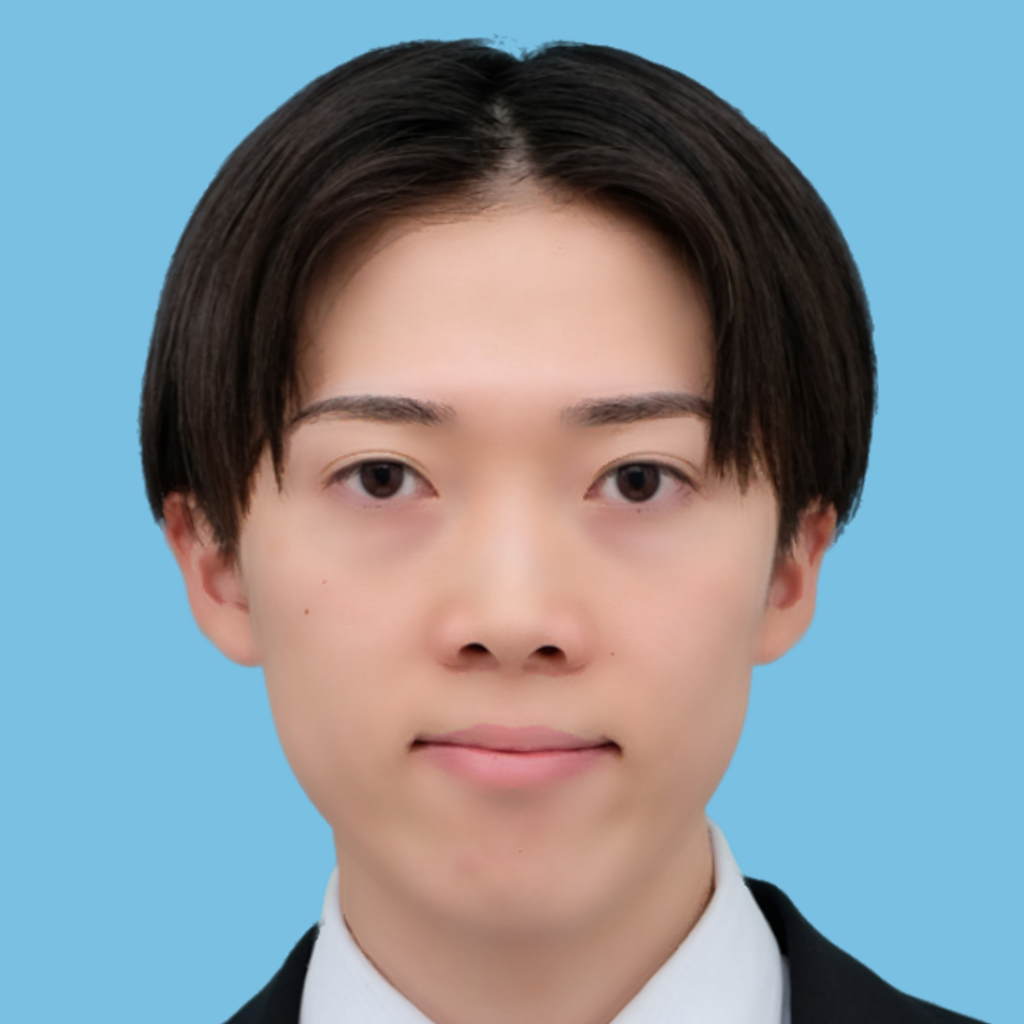

/content/stylegan2-ada-pytorch/pixel2style2pixel/pixel2style2pixel
Cloning into 'pixel2style2pixel'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 418 (delta 0), reused 2 (delta 0), pack-reused 414 (from 1)
Receiving objects: 100% (418/418), 92.94 MiB | 37.07 MiB/s, done.
Resolving deltas: 100% (147/147), done.
/content/stylegan2-ada-pytorch/pixel2style2pixel/pixel2style2pixel/pixel2style2pixel
ERROR: Could not find a version that satisfies the requirement torch==1.9.0 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0, 2.7.0, 2.7.1, 2.8.0, 2.9.0)
ERROR: No matching distribution found for torch==1.9.0

事前学習済みのpSpモデルをダウンロード中...


Downloading...
From (original): https://drive.google.com/uc?id=1bMTNWkh5LArlaWSc_wa8VKyq2V42T2z0
From (redirected): https://drive.google.com/uc?id=1bMTNWkh5LArlaWSc_wa8VKyq2V42T2z0&confirm=t&uuid=81373467-3315-4ded-9388-a6ba269274a1
To: /content/stylegan2-ada-pytorch/pixel2style2pixel/pixel2style2pixel/pixel2style2pixel/psp_ffhq_encode.pt
100%|██████████| 1.20G/1.20G [00:05<00:00, 230MB/s]



1 枚の画像の投影を開始します...
手法: Richardson et al. (2021) - Encoding in Style
特徴: LPIPS損失 + PPL最適化を使用
python3: can't open file '/content/stylegan2-ada-pytorch/pixel2style2pixel/pixel2style2pixel/pixel2style2pixel/scripts/inference_iterative.py': [Errno 2] No such file or directory

出力ファイルを確認中...
ls: cannot access 'projection_output/': No such file or directory
inference_resultsフォルダが見つかりません

⚠️ 結果ファイルが見つかりません。デバッグを試みます...
find: ‘projection_output’: No such file or directory

結果をダウンロードしますか？
	zip warning: name not matched: projection_output/

zip error: Nothing to do! (try: zip -r psp_projection.zip . -i projection_output/)


FileNotFoundError: Cannot find file: psp_projection.zip

In [6]:
# 1. プロジェクトをクローン（画像アライメント用）
!git clone https://github.com/rolux/stylegan2encoder.git
%cd stylegan2encoder

# 2. 依存関係をインストール
!pip install -q scipy dlib

# 3. 顔のランドマークモデルをダウンロード
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

# 4. PILの互換性問題を修正
!sed -i 's/PIL.Image.ANTIALIAS/PIL.Image.LANCZOS/g' ffhq_dataset/face_alignment.py

# 5. フォルダを作成
!mkdir -p raw_images aligned_images

# 6. 画像をアップロード
from google.colab import files
print("あなたの元の顔画像をアップロードしてください:")
uploaded = files.upload()

# 7. アップロードした画像を raw_images フォルダに移動
import shutil
for filename in uploaded.keys():
    shutil.move(filename, f'raw_images/{filename}')
    print(f"移動完了: {filename}")

# 8. 顔画像のアライメント（位置合わせ）を実行
!python align_images.py raw_images/ aligned_images/

# 9. アライメント結果を確認
!ls -lh aligned_images/

# 10. アライメント後の画像を表示
from IPython.display import Image, display
import glob
for img in glob.glob('aligned_images/*.png'):
    print(f"\nアライメント後: {img}")
    display(Image(img))

# ===== 修正版：論文と同じ手法を使用 =====

# 11. 一つ上のディレクトリに戻る
%cd ..

# 12. 競合するdatasetsライブラリをアンインストール（これが問題の原因）
!pip uninstall -y datasets

# 13. pSp encoder をクローン
!git clone https://github.com/eladrich/pixel2style2pixel.git
%cd pixel2style2pixel

# 14. 必要な依存関係をインストール
!pip install -q torch==1.9.0 torchvision==0.10.0
!pip install -q lpips
!pip install -q ninja
!pip install -q gdown
!pip install -q matplotlib
!pip install -q scikit-image

# 15. 事前学習済みモデルをダウンロード
print("\n事前学習済みのpSpモデルをダウンロード中...")
import gdown
model_url = 'https://drive.google.com/uc?id=1bMTNWkh5LArlaWSc_wa8VKyq2V42T2z0'
gdown.download(model_url, 'psp_ffhq_encode.pt', quiet=False)

# 16. 入力画像を準備
!mkdir -p inference_input
aligned_images = glob.glob('../stylegan2encoder/aligned_images/*.png')
if aligned_images:
    for img in aligned_images:
        shutil.copy(img, 'inference_input/')

    print(f"\n{len(aligned_images)} 枚の画像の投影を開始します...")
    print("手法: Richardson et al. (2021) - Encoding in Style")
    print("特徴: LPIPS損失 + PPL最適化を使用")

    # 17. 投影を実行
    !python scripts/inference_iterative.py \
    --images_dir=input_images \
    --save_dir=output_restyle \
    --checkpoint_path=restyle_psp_ffhq_encode.pt \
    --test_batch_size=1 \
    --n_iters_per_batch=10 \
    --resize_outputs \
    --save_intermediate_image_every=2

    # 18. 出力を確認
    print("\n出力ファイルを確認中...")
    !ls -lh projection_output/
    !ls -lh projection_output/inference_results/ 2>/dev/null || echo "inference_resultsフォルダが見つかりません"

    # 19. 結果を表示
    result_files = glob.glob('projection_output/**/*.jpg', recursive=True) + \
                   glob.glob('projection_output/**/*.png', recursive=True)

    if result_files:
        print(f"\n✓ 投影成功！ {len(result_files)} 個の結果ファイルを検出しました")
        for result in sorted(result_files):
            print(f"\n{result}")
            display(Image(result))
    else:
        print("\n⚠️ 結果ファイルが見つかりません。デバッグを試みます...")
        # 詳細なディレクトリ構造を表示
        !find projection_output -type f

else:
    print("アライメント後の画像が見つかりません")

# 20. 結果をダウンロード
print("\n結果をダウンロードしますか？")
!zip -r psp_projection.zip projection_output/
files.download('psp_projection.zip')


/content
Cloning into 'stylegan2encoder'...
remote: Enumerating objects: 111, done.
remote: Total 111 (delta 0), reused 0 (delta 0), pack-reused 111 (from 1)
Receiving objects: 100% (111/111), 1.55 MiB | 33.80 MiB/s, done.
Resolving deltas: 100% (35/35), done.
/content/stylegan2encoder
あなたの元の顔画像をアップロードしてください（複数可）：


Saving 証明写真.jpg to 証明写真.jpg
移動完了: 証明写真.jpg
2025-10-21 06:42:30.485648: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761028950.506854    5272 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761028950.512766    5272 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761028950.529062    5272 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761028950.529092    5272 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761028950.529095    5272 comput

Downloading...
From (original): https://drive.google.com/uc?id=1bMTNWkh5LArlaWSc_wa8VKyq2V42T2z0
From (redirected): https://drive.google.com/uc?id=1bMTNWkh5LArlaWSc_wa8VKyq2V42T2z0&confirm=t&uuid=9ca61c5e-8473-4f02-a2d6-20eaf9f20906
To: /content/pixel2style2pixel/pretrained_models/psp_ffhq_encode.pt
100%|██████████| 1.20G/1.20G [00:06<00:00, 199MB/s]


コピー完了: 1 枚
W1021 06:43:11.131000 5456 torch/utils/cpp_extension.py:2425] TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
W1021 06:43:11.131000 5456 torch/utils/cpp_extension.py:2425] If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'] to specific architectures.
W1021 06:43:55.893000 5456 torch/utils/cpp_extension.py:2425] TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
W1021 06:43:55.893000 5456 torch/utils/cpp_extension.py:2425] If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'] to specific architectures.
Loading pSp from checkpoint: pretrained_models/psp_ffhq_encode.pt
Loading dataset for ffhq_encode
100% 1/1 [00:02<00:00,  2.29s/it]
Runtime 1.7183+-0.0000

=== 出力一覧 ===
find: warning: you have specified the global option -maxdepth after the argument -type, but global options are not positional, i.e., -maxdepth affects tests specified before it as well as those 

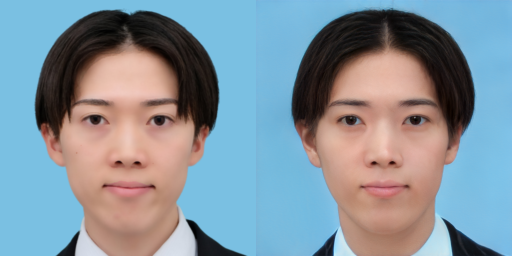

outputs_psp/inference_results/証明写真_01.png


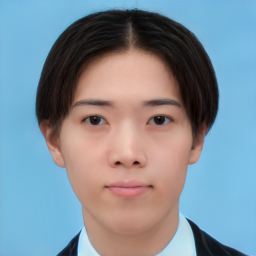

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# ===== 0) 初期化（クリーンにする） =====
%cd /content
!rm -rf stylegan2encoder pixel2style2pixel

# ===== 1) アライメント用リポジトリ =====
!git clone https://github.com/rolux/stylegan2encoder.git
%cd stylegan2encoder

!pip install -q scipy dlib
!wget -q https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

# PIL の互換修正
!sed -i 's/PIL.Image.ANTIALIAS/PIL.Image.LANCZOS/g' ffhq_dataset/face_alignment.py

!mkdir -p raw_images aligned_images

from google.colab import files
print("あなたの元の顔画像をアップロードしてください（複数可）：")
uploaded = files.upload()

import shutil
for filename in uploaded.keys():
    shutil.move(filename, f'raw_images/{filename}')
    print(f"移動完了: {filename}")

# 顔アライメント
!python align_images.py raw_images/ aligned_images/

# ===== 2) pSp 本体 =====
%cd /content
!git clone https://github.com/eladrich/pixel2style2pixel.git
%cd pixel2style2pixel

# Colab は torch==1.9.0 が入らないため、2.x で動かす
# 依存は requirements.txt ではなく個別に入れる
!pip install -q torch torchvision  # Colab 提供の最新版(2.x)が入る
!pip install -q lpips ninja gdown matplotlib scikit-image tqdm scipy pillow

# 学習済みモデルを配置
!mkdir -p pretrained_models
import gdown
print("\n事前学習済みのpSpモデルをダウンロード中...")
gdown.download('https://drive.google.com/uc?id=1bMTNWkh5LArlaWSc_wa8VKyq2V42T2z0',
               'pretrained_models/psp_ffhq_encode.pt', quiet=False)

# 入力画像をコピー
!mkdir -p inference_input
import glob, shutil, os
aligned = glob.glob('/content/stylegan2encoder/aligned_images/*.png')
for p in aligned:
    shutil.copy(p, 'inference_input/')
print(f"コピー完了: {len(aligned)} 枚")

# ===== 3) 推論（正しいスクリプト/引数）=====
# pSp での基本推論スクリプトは scripts/inference.py
# data_path はフォルダ、checkpoint_path は上でDLしたファイル
!python scripts/inference.py \
  --checkpoint_path pretrained_models/psp_ffhq_encode.pt \
  --data_path inference_input \
  --exp_dir outputs_psp \
  --resize_outputs \
  --test_batch_size 1

# ===== 4) 結果確認・ダウンロード =====
!echo -e "\n=== 出力一覧 ==="
!find outputs_psp -type f -maxdepth 3 -print

# 代表的な出力を少し表示
from IPython.display import Image, display
outs = sorted(glob.glob('outputs_psp/**/*.png', recursive=True))[:8]
for o in outs:
    print(o)
    display(Image(o))

# zip化してダウンロード
!zip -qr psp_projection.zip outputs_psp
from google.colab import files as colab_files
colab_files.download('psp_projection.zip')


In [ ]:
!ls -lh out/

total 164M
-rw-r--r-- 1 root root  37K Oct 14 07:53 projected_w.npz
-rw-r--r-- 1 root root 162M Oct 14 07:53 proj.mp4
-rw-r--r-- 1 root root 1.1M Oct 14 07:53 proj.png
-rw-r--r-- 1 root root 1.4M Oct 14 07:53 target.png


In [ ]:
from google.colab import files
files.download('out/proj.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>